# Competitor's Moving Average Normalized
## Description
For the target company we take the average stock price of similar companies during any number of days and normalize the time series. The difference between the target company and the CMAN will tell us if it's overpriced relatively to its competitors.
## Limitations
* The sources from which these competitors are retrieved (Finnhub or Polygon) often choose some tickers that are young relatively to our target so we have to observe the strategy on a short timeframe if we don't want backfilled data.
* The library does not offer the option to differentiate the nationality of the competitors.

In [2]:
from openbb_terminal.sdk import openbb as obb
import yfinance as yf

In [3]:
#Inputs
target="AAPL"
days=30
source="Finnhub" #Choose from Finnhub or Polygon

In [4]:
#Creates a list of similar stocks relatively to the target
similar=obb.stocks.ca.similar(target, source)

#Polygon does not add the target's ticker
if source=="Polygon":
    similar.append(target)

In [13]:
#Removes empty tickers
for i in range(len(similar)):
    if obb.stocks.load(symbol=similar[i]).empty==True:
        del similar[i]
        i

Loading Daily data for AAPL with starting period 2020-08-11.

Loading Daily data for DELL with starting period 2020-08-11.

Loading Daily data for HPQ with starting period 2020-08-11.

Loading Daily data for HPE with starting period 2020-08-11.

Loading Daily data for NTAP with starting period 2020-08-11.

Loading Daily data for SMCI with starting period 2020-08-11.

Loading Daily data for WDC with starting period 2020-08-11.

Loading Daily data for PSTG with starting period 2020-08-11.

Loading Daily data for IONQ with starting period 2021-01-04.

In [7]:
#Creates a list with each ticker's trading date.
dates=[]
for i in range(len(similar)):
    dates.append(yf.Ticker(similar[i]).history(period="max").index[0].date())

#Sorts it
dates.sort()

In [8]:
#Builds a dataframe with the similar stocks, takes the oldest date in which all the stocks were public.
hist=obb.stocks.ca.hist(similar, dates[-1])

#Backfills any NaN values
hist.bfill()

#Normalizes the dataset
hist=(hist-hist.min())/(hist.max()-hist.min())

NaN values found in: SMCI.  Backfilling data

In [9]:
#Adds a column with the competitor's rolling average over the specified time frame
hist["CMAN"]=hist.drop(target, axis=1).mean(axis=1).rolling(window=days).mean()

#Adds a moving average for reference
#hist["SMA"]=obb.ta.ma(data=hist[target], window=[days], ma_type="SMA") #Not working
hist["MA"]=hist[target].rolling(window=days).mean()

<Axes: xlabel='Date'>

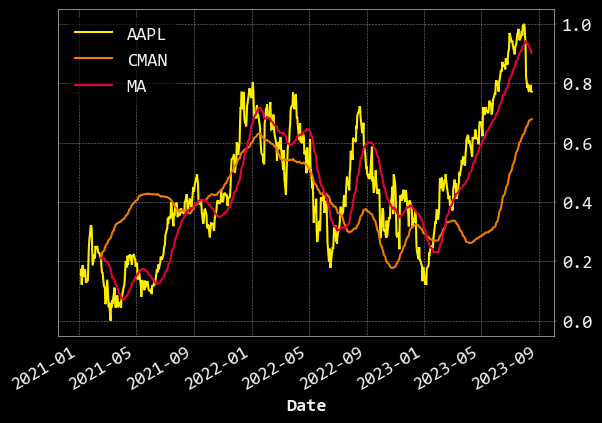

In [10]:
graph=hist[[target,"CMAN","MA"]]
graph.plot(kind='line')